In [1]:
from a2c_agent import *
from networks import *


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:2: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


In [3]:
env = gym.make('CartPole-v1')

In [4]:
agent=A2cAgent(env)

/home/hjamil/venv/lib/python3.10/site-packages/flatbuffers/compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp
/home/hjamil/venv/lib/python3.10/site-packages/keras/utils/image_utils.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': pil_image.NEAREST,
/home/hjamil/venv/lib/python3.10/site-packages/keras/utils/image_utils.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': pil_image.BILINEAR,
/home/hjamil/venv/lib/python3.10/site-packages/keras/utils/image_utils.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': pil_image.BICUBIC,
/home/hjamil/venv/lib/python3.10/site-p

In [5]:
agent.training_agent()

/home/hjamil/RL-Optimizer/codes/a2c/a2c_agent.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for episode in tqdm_notebook(range(NUM_EPISODES)):


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


reward from episode 0 is 15.0
reward from episode 1 is 21.0
reward from episode 2 is 19.0
reward from episode 3 is 14.0
reward from episode 4 is 23.0
reward from episode 5 is 48.0
reward from episode 6 is 8.0
reward from episode 7 is 10.0
reward from episode 8 is 11.0
reward from episode 9 is 10.0
reward from episode 10 is 8.0
reward from episode 11 is 8.0
reward from episode 12 is 9.0
reward from episode 13 is 9.0
reward from episode 14 is 10.0
reward from episode 15 is 10.0
reward from episode 16 is 9.0
reward from episode 17 is 9.0
reward from episode 18 is 9.0
reward from episode 19 is 10.0
reward from episode 20 is 10.0
reward from episode 21 is 8.0
reward from episode 22 is 10.0
reward from episode 23 is 9.0
reward from episode 24 is 9.0
reward from episode 25 is 9.0
reward from episode 26 is 9.0
reward from episode 27 is 10.0
reward from episode 28 is 9.0
reward from episode 29 is 9.0
reward from episode 30 is 9.0
reward from episode 31 is 10.0
reward from episode 32 is 8.0
rewa

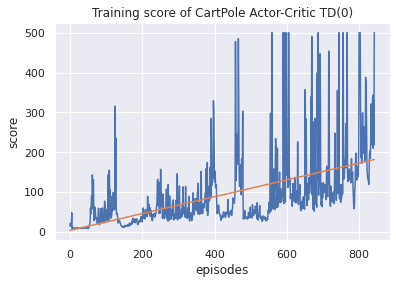

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

sns.set()

plt.plot(agent.scores)
plt.ylabel('score')
plt.xlabel('episodes')
plt.title('Training score of CartPole Actor-Critic TD(0)')

reg = LinearRegression().fit(np.arange(len(agent.scores)).reshape(-1, 1), np.array(agent.scores).reshape(-1, 1))
y_pred = reg.predict(np.arange(len(agent.scores)).reshape(-1, 1))
plt.plot(y_pred)
plt.show()

In [7]:
agent.save_model()

In [6]:
done = False
state = agent.env.reset()
scores = []
import tqdm
for _ in tqdm.notebook.tqdm(range(50)):
    state = agent.env.reset()
    done = False
    score = 0
    while not done:
        #env.render()
        action, lp = select_action(agent.actor_network, state,agent.DEVICE)
        new_state, reward, done, info = agent.env.step(action)
        score += reward
        state = new_state
    scores.append(score)
agent.env.close()
np.array(scores).mean()

  0%|          | 0/50 [00:00<?, ?it/s]

9.22